In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# template_path = '/content/drive/MyDrive/AIO 2024/Module_2/Week-4/T6/Data template/template.png'
img_path = '/content/drive/MyDrive/AIO 2024/Module_2/Week-4/T6/Data template/image.png'

In [14]:
# Đọc ảnh
img_color = cv2.imread(img_path,flags=1)
print(img_color.shape)
# template = cv2.imread(template_path,flags=1)
# template = img_color[265:380,170:470]
# template = img_color[170:280,170:400]
template = img_color[170:260,170:370]
print(template.shape)

(938, 1074, 3)
(90, 200, 3)


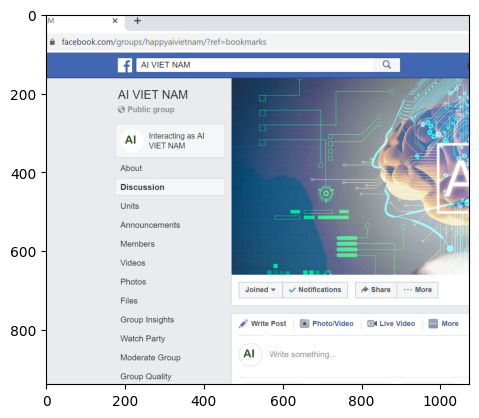

In [7]:
# Hiển thị ảnh lên
plt.imshow(img_color[:,:,::-1])

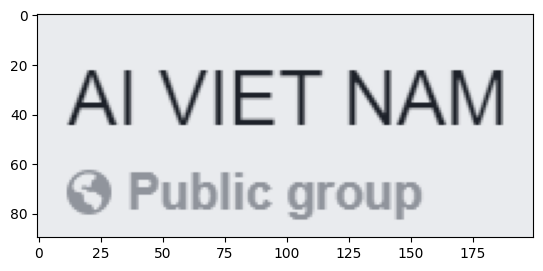

In [15]:
plt.imshow(template[:,:,::-1])

In [16]:
def compute_correlation_coefficient(arr1,arr2):
  mean_arr1 = np.mean(arr1)
  mean_arr2 = np.mean(arr2)
  std_arr1 = np.std(arr1)
  std_arr2 = np.std(arr2)
  covariance = np.sum((arr1-mean_arr1)*(arr2-mean_arr2))/arr1.size
#Tại sao lại xét thêm điều kiện cho correlation vì nếu một trong hai std = 0 => correlation = số / 0 -> vô cùng -> chương trình sẽ lấy vùng này có corrcoef -> sai
  return covariance/(std_arr1*std_arr2) if std_arr1*std_arr2 != 0 else 0

In [58]:
# def template_matching(img,template):
#   template = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)
#   img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   result = np.zeros(img_gray.shape)
#   for i in range(img_gray.shape[0]-template.shape[0]+1):
#     for j in range(img_gray.shape[1]-template.shape[1]+1):
#       result[i+template.shape[0]//2,j+template.shape[1]//2] = compute_correlation_coefficient(img_gray[i:i+template.shape[0],j:j+template.shape[1]].flatten(),template.flatten())
#   # Trả về chỉ số cột và chỉ số hàng của phần tử có hệ số correlation max
#   agr_max_corr = np.unravel_index(np.argmax(result),result.shape)
#   print(agr_max_corr)
#   img[agr_max_corr[0]-template.shape[0]//2,agr_max_corr[1]-template.shape[1]//2 : agr_max_corr[1]+template.shape[1]//2] = np.array([0,0,255])
#   img[agr_max_corr[0]+template.shape[0]//2,agr_max_corr[1]-template.shape[1]//2 : agr_max_corr[1]+template.shape[1]//2] = np.array([0,0,255])
#   img[agr_max_corr[0]-template.shape[0]//2:agr_max_corr[0]+template.shape[0]//2,agr_max_corr[1]-template.shape[1]//2] = np.array([0,0,255])
#   img[agr_max_corr[0]-template.shape[0]//2:agr_max_corr[0]+template.shape[0]//2,agr_max_corr[1]+template.shape[1]//2] = np.array([0,0,255])
#   print(result[agr_max_corr[0],agr_max_corr[1]])
#   return img

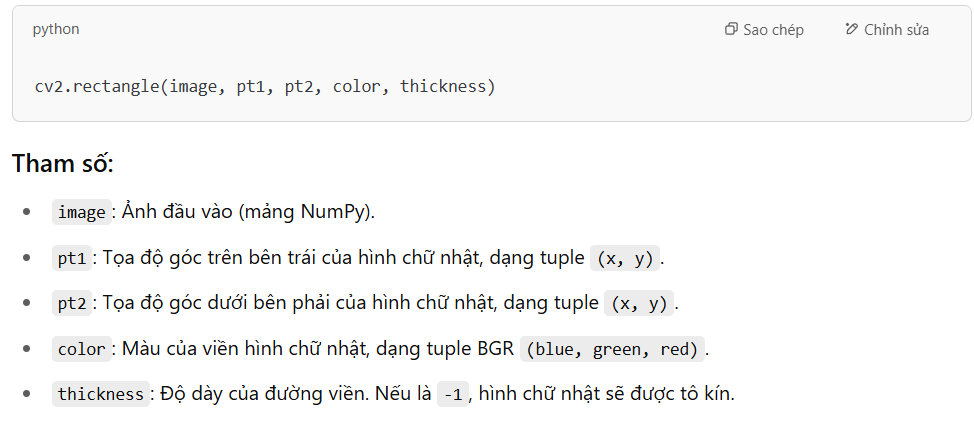

In [17]:
# Chỉnh lại hàm template maching
def template_matching(img,template):
  template = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)
  img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  result = np.zeros(img_gray.shape)
  for i in range(img_gray.shape[0]-template.shape[0]+1):
    for j in range(img_gray.shape[1]-template.shape[1]+1):
      result[i,j] = compute_correlation_coefficient(img_gray[i:i+template.shape[0],j:j+template.shape[1]].flatten(),template.flatten())
#Trả về chỉ số cột và chỉ số hàng của phần tử có hệ số correlation max
  agr_max_corr = np.unravel_index(np.argmax(result),result.shape)
  print(agr_max_corr)
  top_left = (agr_max_corr[1],agr_max_corr[0])
  bottom_right = (agr_max_corr[1]+template.shape[1],agr_max_corr[0]+template.shape[0])
  cv2.rectangle(img,top_left,bottom_right,(0,0,255),2)
  print(result[agr_max_corr[0],agr_max_corr[1]])
  return img

In [18]:
img_color_result= template_matching(img_color,template)

(np.int64(170), np.int64(170))
1.0


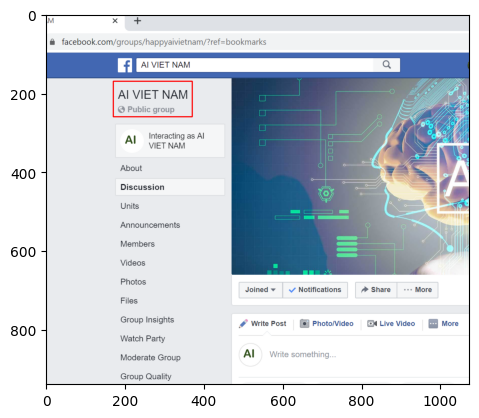

In [19]:
plt.imshow(img_color_result[:,:,::-1])